In [33]:
import numpy as np
import scipy.ndimage as spndim
import pandas as pd
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colorbar as mcb
import matplotlib.ticker as mtk
import utils.engine as ue
import utils.visualizer as uv

In [2]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

In [ ]:
# with open("Validation/SHEBA_Data/01-forcing.dat") as file:
#     arr = file.readlines()
    
# cols_1 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_1 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/02-hs-hi_thickness.dat") as file:
#     arr = file.readlines()
    
# cols_2 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_2 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/06-depth_pit.dat") as file:
#     arr = file.readlines()
    
# file_6 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])
# file_6[:, 0] = np.round(file_6[:, 0], 4)

In [ ]:
# with open("Validation/SHEBA_Data/07-pit_fcond.dat") as file:
#     arr = file.readlines()
    
# cols_7 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_7 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/08-tocn.dat") as file:
#     arr = file.readlines()
    
# file_8 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])

In [ ]:
# with open("Validation/SHEBA_Data/09-focn.dat") as file:
#     arr = file.readlines()
    
# cols_9 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_9 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/10-temp.dat") as file:
#     arr = file.readlines()
    
# file_10 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])

In [ ]:
# with open("Validation/SHEBA_Data/11-turbflux.dat") as file:
#     arr = file.readlines()
    
# cols_11 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_11 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# data = pd.DataFrame(file_1, columns=cols_1)

# data_2 = pd.DataFrame(file_2, columns=cols_2)
# data = data.merge(data_2.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_2['jday']*1000).astype('int32')).iloc[:, 1:]

# data_6 = pd.DataFrame(file_6, columns=['jday', 'hs', 'hi', 'hs_level', 'hf_level', 'hi_level'])
# data = data.merge(data_6.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_6['jday']*1000).astype('int32')).iloc[:, 1:]

# data_7 = pd.DataFrame(file_7, columns=cols_7)
# data = data.merge(data_7.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_7['jday']*1000).astype('int32')).iloc[:, 1:]

# data_8 = pd.DataFrame(file_8, columns=['jday', 'Tocn'])
# data = data.merge(data_8.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_8['jday']*1000).astype('int32')).iloc[:, 1:]

# data_9 = pd.DataFrame(file_9, columns=cols_9)
# data = data.merge(data_9.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_9['jday']*1000).astype('int32')).iloc[:, 1:]

# data_10 = pd.DataFrame(file_10, columns=['jday'] + ['T_{}'.format(i) for i in range(1, 51)])
# data = data.merge(data_10.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_10['jday']*1000).astype('int32')).iloc[:, 1:]

# data_11 = pd.DataFrame(file_11, columns=cols_11)
# data = data.merge(data_11.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_11['jday']*1000).astype('int32')).iloc[:, 1:]

In [ ]:
# data.to_csv('Validation/full_data.csv', index=False)

In [506]:
with open("Validation/SHEBA_Data/12-levels.dat") as file:
    Z = [float(z.replace(' ', '')[:-1]) for z in file.readlines()]

In [507]:
data = pd.read_csv('Validation/full_data.csv')

In [6]:
data.columns

Index(['jday', 'uair', 'tair', 'qair', 'lwdo', 'swdo', 'prec', 'Focn_x',
       'albe', 'hs_best', 'hf_best', 'hi_best', 'hs_x', 'hi_x', 'hs_level',
       'hf_level', 'hi_level', 'Tss', 'Tis', 'Tib', 'Tsurf', 'hs_y', 'hi_y',
       'hf', 'Fcss', 'Fcsb', 'Fcis', 'Fcib', 'Fmib', 'Focn_y', 'Trod', 'Fcsf',
       'Tocn', 'focn_pit', 'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7',
       'T_8', 'T_9', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16',
       'T_17', 'T_18', 'T_19', 'T_20', 'T_21', 'T_22', 'T_23', 'T_24', 'T_25',
       'T_26', 'T_27', 'T_28', 'T_29', 'T_30', 'T_31', 'T_32', 'T_33', 'T_34',
       'T_35', 'T_36', 'T_37', 'T_38', 'T_39', 'T_40', 'T_41', 'T_42', 'T_43',
       'T_44', 'T_45', 'T_46', 'T_47', 'T_48', 'T_49', 'T_50', 'fsen', 'flat',
       'Tib_interp', 'Tis_interp', 'Tss_interp', 'prec_eff'],
      dtype='object')

In [ ]:
prec = 5.
cmap_base = plt.get_cmap('rainbow')
vmin = data.loc[:, 'T_1':'T_50'].values.min()
vmax = data.loc[:, 'T_1':'T_50'].values.max()

boundaries = np.concatenate(([vmin], np.arange(np.floor(vmin + prec), vmax, prec), [vmax]))
centers = (boundaries[1:] + boundaries[:-1])/2
centers_scaled = (centers - vmin) / (vmax - vmin)

cmap_custom = clr.ListedColormap([cmap_base(x) for x in centers_scaled])
norm_custom = clr.BoundaryNorm(boundaries, cmap_custom.N)

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(data.loc[:, 'T_1':'T_50'].T,
           aspect='auto', cmap=cmap_custom, norm=norm_custom,
           extent=[data.loc[0, 'jday'], data.loc[data.index[-1], 'jday'], Z[-1], Z[0]])
plt.plot(data['jday'], data['hs_level'], color='white', lw=3, ls=':', label='snow surface')
plt.plot(data['jday'], data['hf_level'], color='white', lw=3, ls='--', label='snow-ice interface')
plt.plot(data['jday'], data['hi_level'], color='white', lw=3, label='ice base')
plt.plot(data['jday'], data['hs_best'], color='black', lw=3, ls=':', label='snow surface best')
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(loc='lower left', facecolor='black', labelcolor='white', prop={'size': 20})
plt.colorbar(ticks=boundaries)
# plt.savefig('test-image.png', dpi=150)
plt.show()

Судя по статье (Fig.5 (a), (b)), чёрные точки - это метод приближения, использованный в статье Хувальда

In [469]:
# sigma mesh
dsigma_ice = np.full(20, 1.0/20)
dsigma_snow = np.full(5, 1.0/5)

In [533]:
# init state from data
T_ice_init, T_snow_init, Toi_init, Tis_init, Tsa_init, \
dzi_init, dzs_init = ue.get_init_from_data(data, Z, dsigma_ice, dsigma_snow)

# time_arr = ((data['jday'] - data.loc[0, 'jday'])*24*3600).values
time_arr = data['jday'].values

In [534]:
# process from data
process_data = ue.process_from_data(Z,
                                    data.loc[:, 'T_1':'T_50'].values, 
                                    data['Tib_interp'].values, data['Tis_interp'].values,
                                    data['Tss'].values,
                                    data['hi_best'].values, data['hf_best'].values,
                                    data['hs_best'].values,
                                    np.ones(20)/20.0, np.ones(5)/5.0,
                                    time_arr, ue.rho_i)

[[0.097    0.097    0.097    ... 0.097    0.097    0.097   ]
 [0.097005 0.097005 0.097005 ... 0.097005 0.097005 0.097005]
 [0.09701  0.09701  0.09701  ... 0.09701  0.09701  0.09701 ]
 ...
 [0.075335 0.075335 0.075335 ... 0.075335 0.075335 0.075335]
 [0.075335 0.075335 0.075335 ... 0.075335 0.075335 0.075335]
 [0.07533  0.07533  0.07533  ... 0.07533  0.07533  0.07533 ]]
[[0.032   0.032   0.032   0.032   0.032  ]
 [0.03196 0.03196 0.03196 0.03196 0.03196]
 [0.03192 0.03192 0.03192 0.03192 0.03192]
 ...
 [0.02334 0.02334 0.02334 0.02334 0.02334]
 [0.02334 0.02334 0.02334 0.02334 0.02334]
 [0.02336 0.02336 0.02336 0.02336 0.02336]]


In [ ]:
# forcing
e_s = lambda T: 6.11*np.exp(ue.c1_i*T/(T + ue.T0 - ue.c2_i))
q_surf = lambda T: 0.622*e_s(T)/(ue.P_surf - 0.378*e_s(T))

albe = data['albe'].values
Tib_interp = data['Tib_interp'].values
tair = data['tair'].values
uair = data['uair'].values
qair = data['qair'].values
prec = data['prec_eff'].values
swdo = data['swdo'].values
lwdo = data['lwdo'].values
focn_pit = data['focn_pit'].values
Focn_y = data['Focn_y'].values


find_index_fast = lambda time_sec: np.searchsorted(time_arr, time_sec, side='right') - 1
albedo = lambda time: albe[find_index_fast(time)]
Toi = lambda time: Tib_interp[find_index_fast(time)]
T_a = lambda time: tair[find_index_fast(time)] - ue.T0
u_a = lambda time: uair[find_index_fast(time)]
q_a = lambda time: qair[find_index_fast(time)] * 1e-3
p = lambda time: prec[find_index_fast(time)] * ue.mmd_to_ms
F_sw = lambda time: swdo[find_index_fast(time)]
F_lw = lambda time: lwdo[find_index_fast(time)]
F_bolz = lambda T: -ue.sigma*(T + ue.T0)**4
F_sh = lambda T, time: ue.rho_a*ue.c_pa*ue.C_sh*u_a(time)*(T_a(time) - T)
F_lh = lambda T, time: ue.rho_a*ue.L_s0*ue.C_lh*u_a(time)*(q_a(time) - q_surf(T))
F_P = lambda T, time: p(time)*ue.rho_w*ue.c_pw*max(T_a(time) - T, 0)
F_atm = lambda T, time, i_0: ue.emissivity*(F_lw(time) + F_bolz(T)) \
                           + (1 - albedo(time))*(1 - i_0)*F_sw(time) \
                           + F_sh(T, time) + F_P(T, time) + F_lh(T, time) 

F_atm_ice = lambda T, time: F_atm(T, time, ue.i0_i)
F_atm_snow = lambda T, time: F_atm(T, time, ue.i0_s)
F_ocn = lambda T, time: Focn_y[find_index_fast(time)]

In [ ]:
%%time
process_sim = ue.main_process \
(
    time_step=3600.0,
    time_end=7774*3600.0,
    N_pseudoiter=50,
    Ti_init=T_ice_init,
    Ts_init=T_snow_init,
    Tis_init=Tis_init,
    Tsa_init=Tsa_init,
    dzi_init=dzi_init,
    dzs_init=dzs_init,
    salinity=np.linspace(4.0, 1.0, len(dzi_init)),
    snow_thickness_threshold=0.01,
    Toi=Toi,
    Ta=T_a,
    p=p,
    F_atm_ice=F_atm_ice,
    F_atm_snow=F_atm_snow,
    F_sw=F_sw,
    F_ocn=F_ocn
)

Bbox(x0=0.125, y0=0.27438502673796794, x1=0.9, y1=0.88)


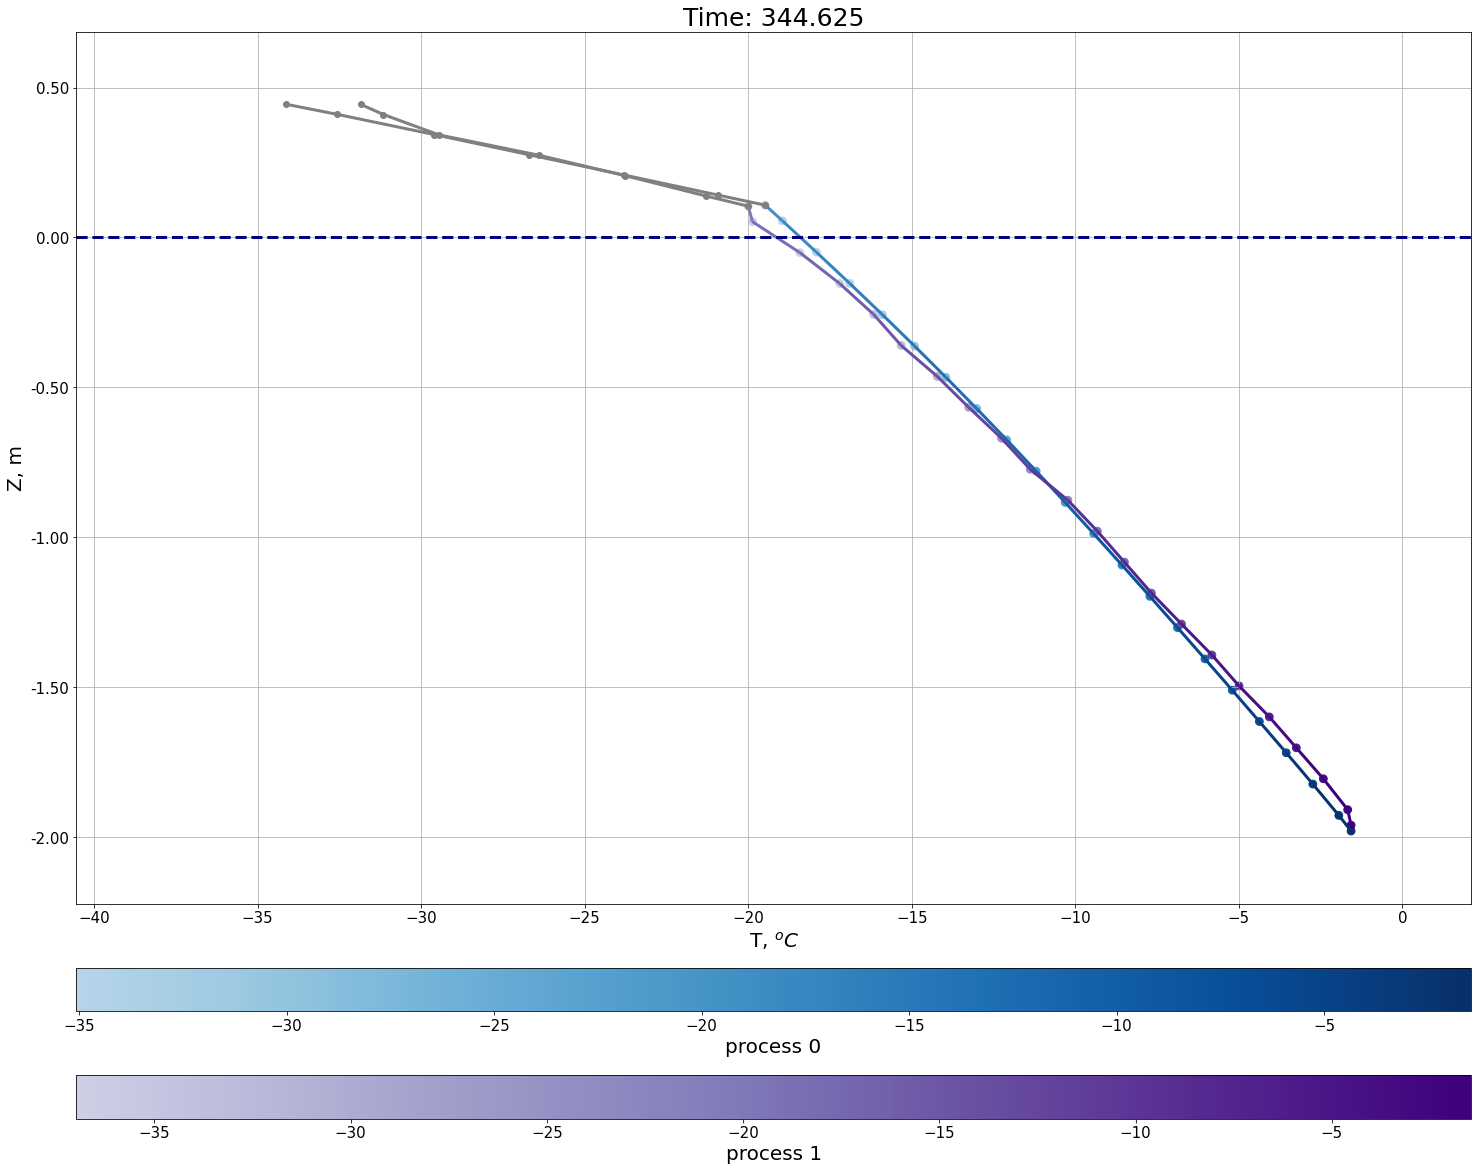

In [684]:
test_anim = uv.animate([process_sim[:1000], process_data[:1000]], savepath='test.mp4')

In [670]:
test_anim#.save('test.mp4')

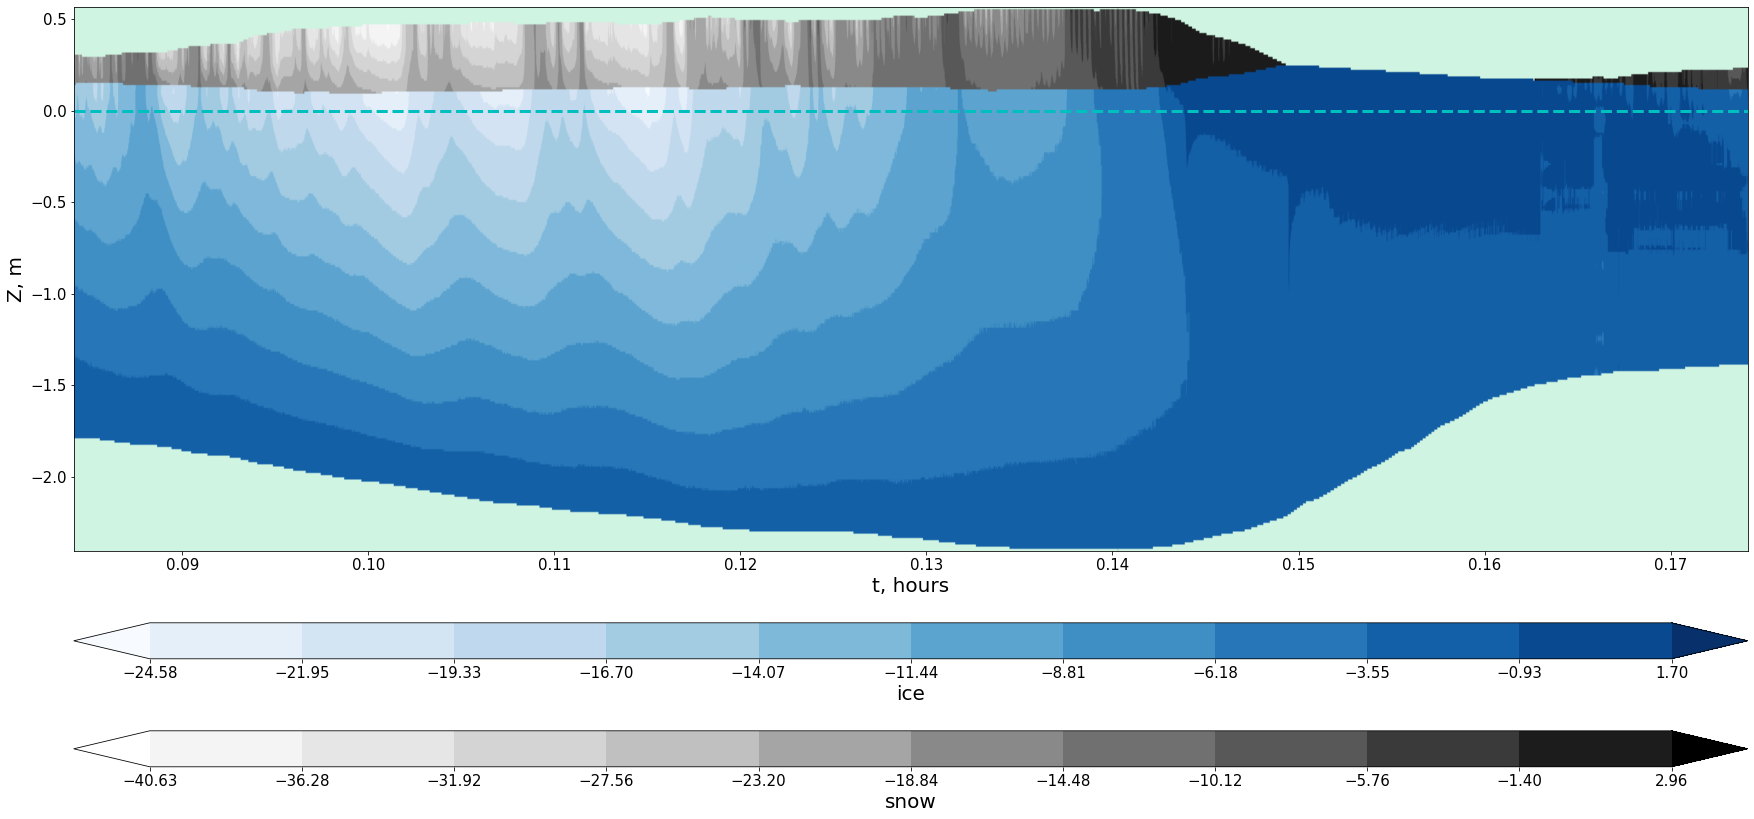

In [685]:
out = uv.timeseries_img(process_data, y_points=250)#, savepath='timeseries.png')

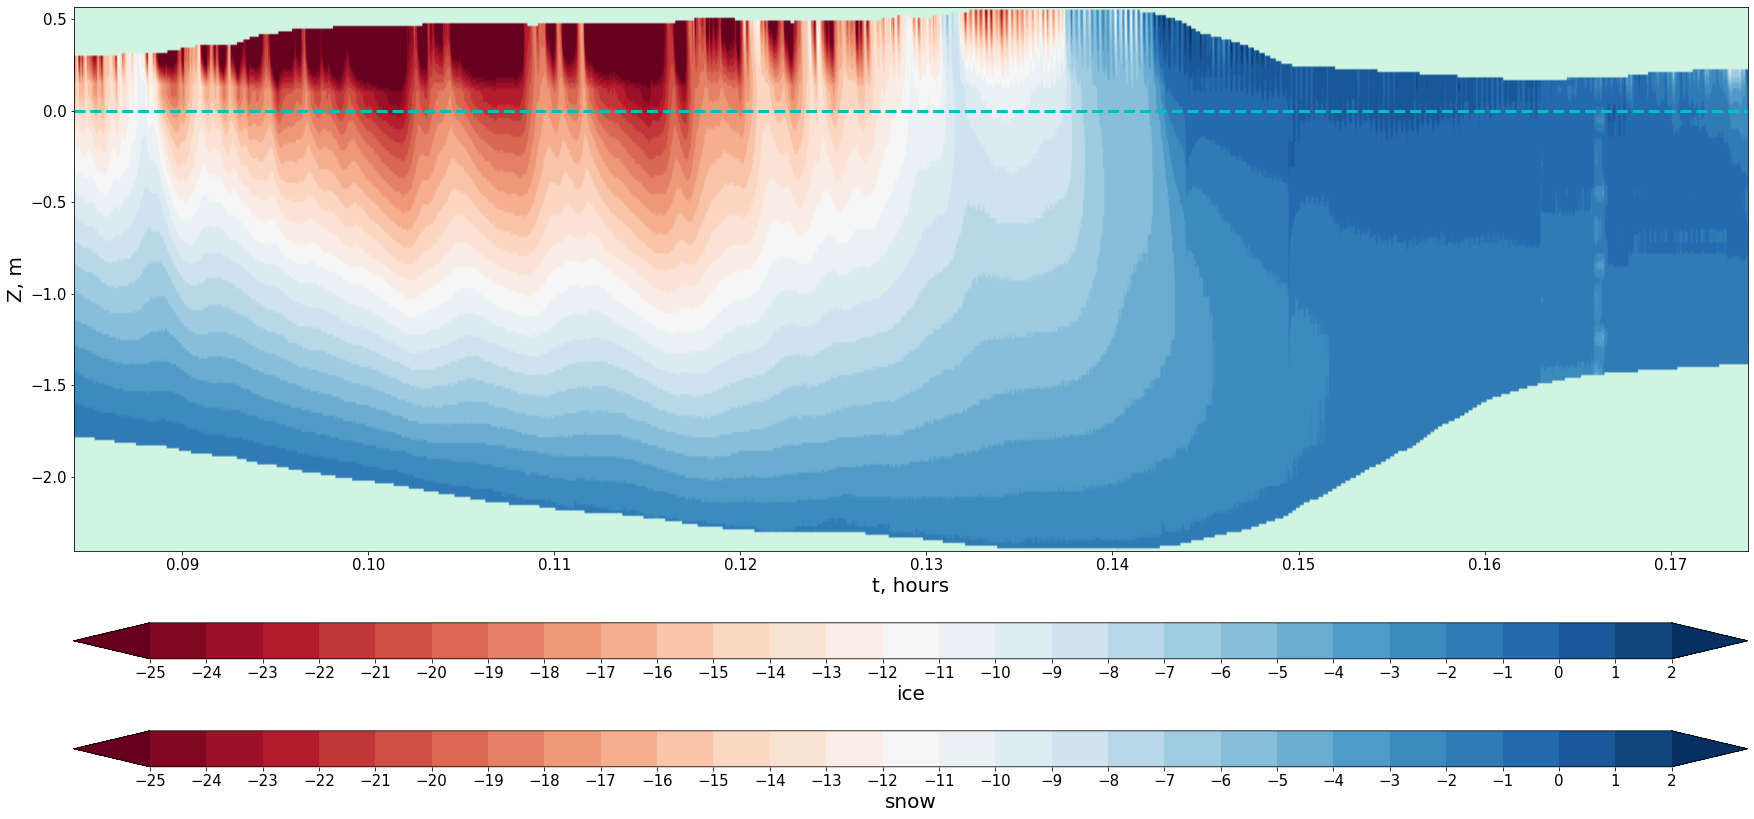

In [573]:
uv.timeseries_img(process_data, y_points=200,
                  cmap_ice='RdBu', tmin_ice=-25, tmax_ice=2, step_ice=1.0,
                  cmap_snow='RdBu', tmin_snow=-25, tmax_snow=2, step_snow=1.0)

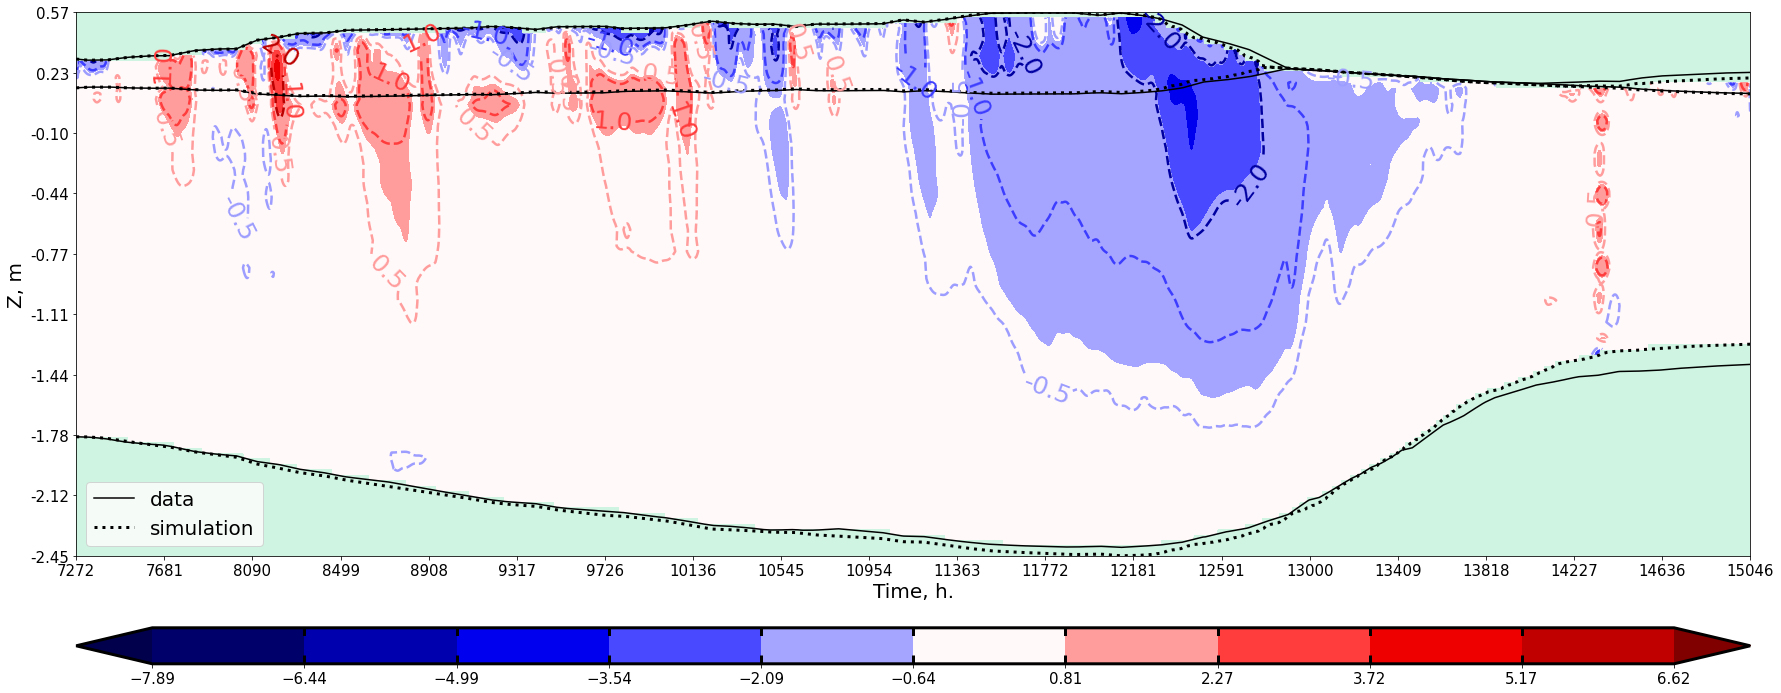

In [680]:
uv.timeseries_err(process_sim, process_data, x_ticks=20, y_ticks=10)

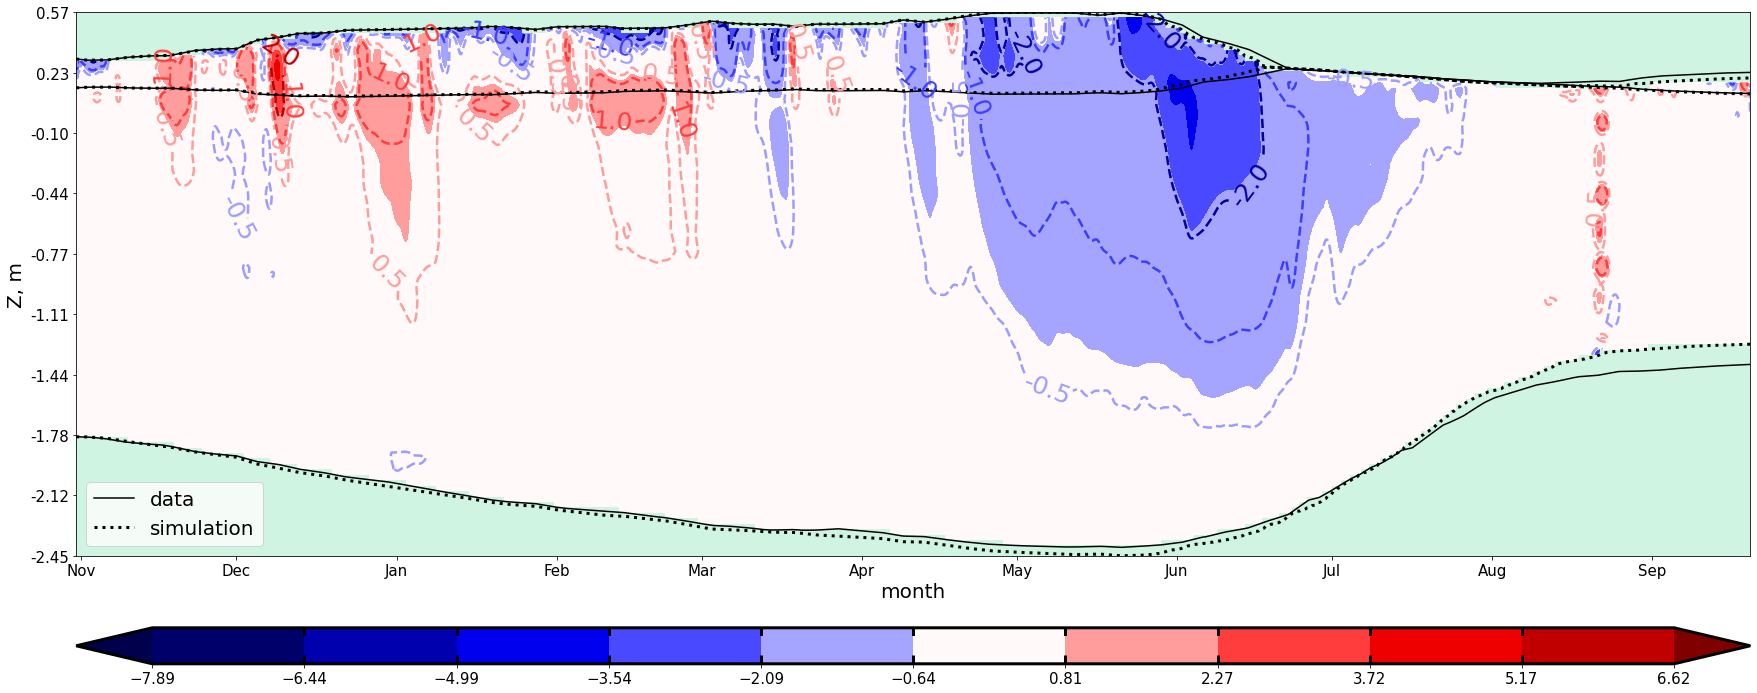

In [679]:
uv.timeseries_err(process_sim, process_data, mode='month', x_ticks=20, y_ticks=10)

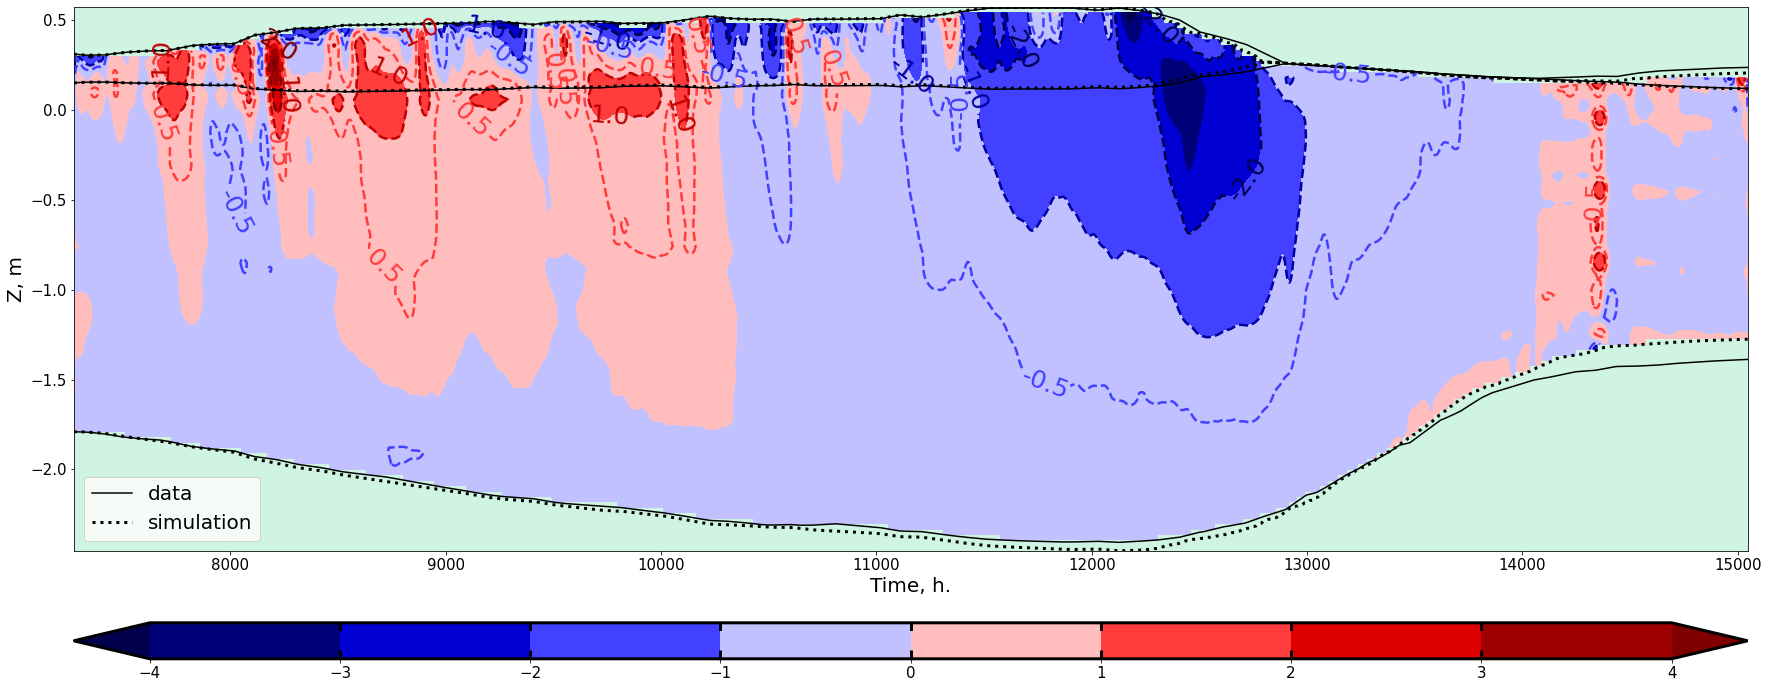

In [677]:
uv.timeseries_err(process_sim, process_data, tmin_err=-4., tmax_err=4., step_err=1.)

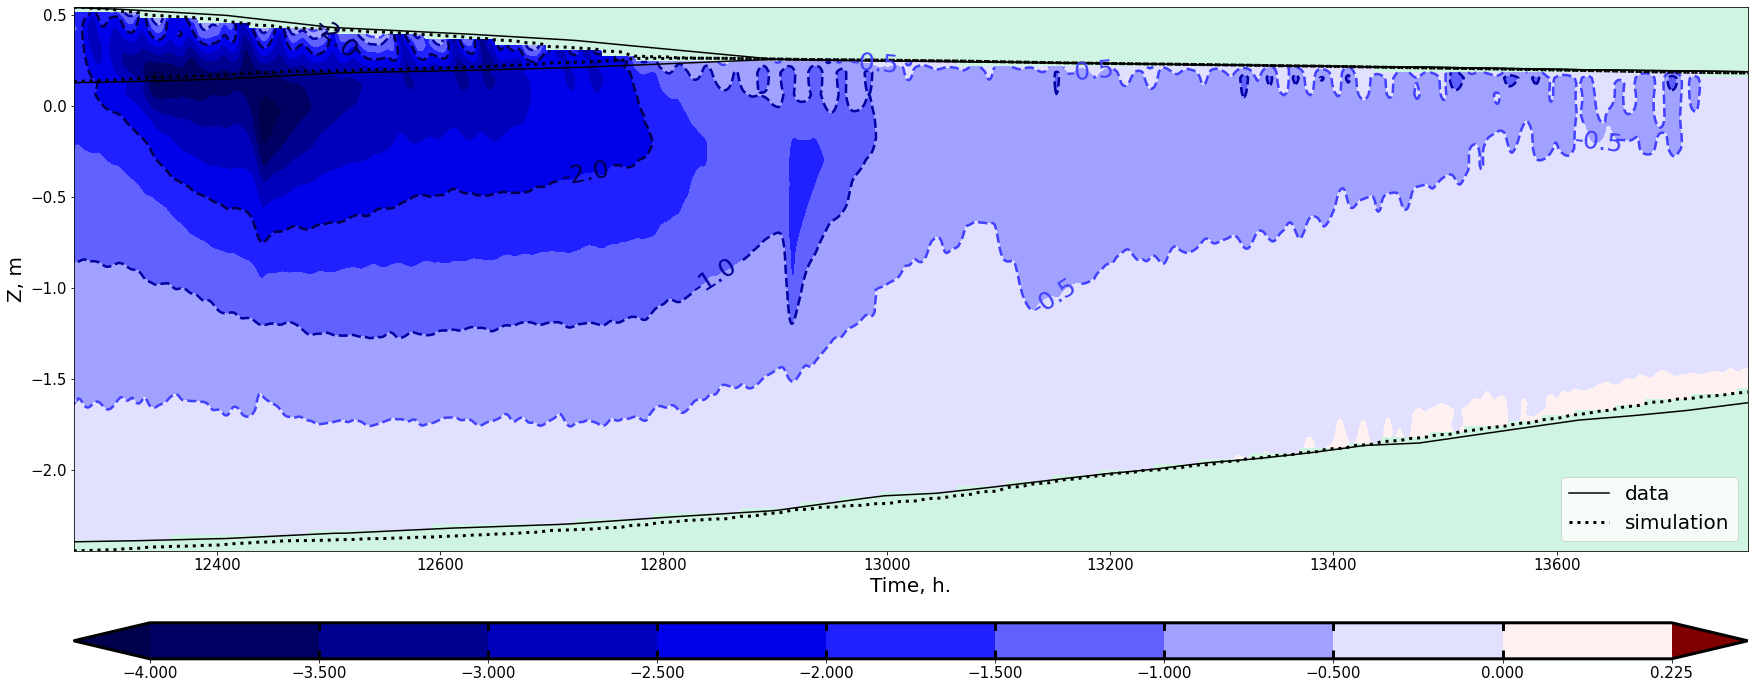

In [676]:
uv.timeseries_err(process_sim[5000:6500], process_data[5000:6500], tmin_err=-4., step_err=.5)

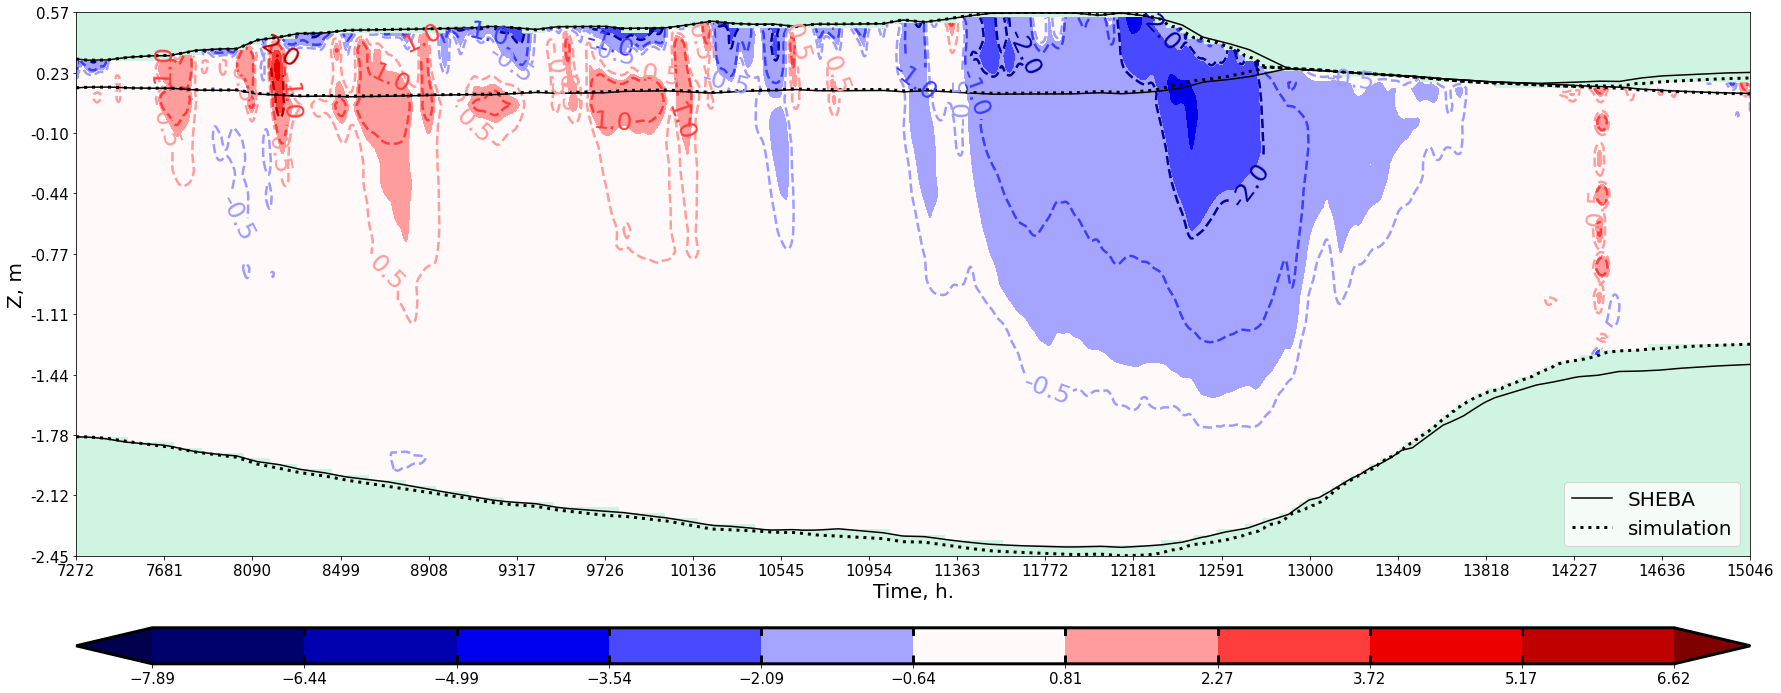

In [682]:
uv.timeseries_err(process_sim, process_data, x_ticks=20, y_ticks=10,
                  label_data='SHEBA', legend_loc='lower right')